# 1. Understand folder structure. Perform operations on files in different folders.

I made a folder for this assignment called "assignment".
This folder is located in "Desktop/CEU/Fall term/Coding for Economists/assignment".

# 2. Automate repeating tasks using Python “for” loops.

In [140]:
a = ['91', '91347', '173', '3']
a.sort
a

['91', '91347', '173', '3']

In [142]:
for element in a:
    print(element)

91
91347
173
3


# 3. Use Python “lists” and “dictionaries” appropriately. Demonstrate one of the two.

In [128]:
class_size = {
    'public policy': 13,
    'economics': 18, 
    'philosophy': 20
}

In [130]:
print(type(class_size))
print(class_size)

<class 'dict'>
{'public policy': 13, 'economics': 18, 'philosophy': 20}


In [134]:
for i in class_size:
    print(class_size)

{'public policy': 13, 'economics': 18, 'philosophy': 20}
{'public policy': 13, 'economics': 18, 'philosophy': 20}
{'public policy': 13, 'economics': 18, 'philosophy': 20}


In [148]:
for key, value in class_size.items():
    print('The number of students in the', key, 'class is', value, '.')

The number of students in the public policy class is 13 .
The number of students in the economics class is 18 .
The number of students in the philosophy class is 20 .


In [144]:
for key in class_size.keys():
    print(key)

public policy
economics
philosophy


In [150]:
for value in class_size.values():
    print(value)

13
18
20


# 5. Read .csv data in. Fix common data quality errors (for example, string vs number, missing value).

I found I found that "Name" column has Garbled text such as "Anj?". Thus I made a new column called "City" which is fixed the error.

In [155]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [304]:
#import data
raw_df = pd.read_csv("city-size-japan.csv")

In [306]:
#look at the data: I found that "Name" variable has Garbled text such as "Anj?"
raw_df.head()

,Name,pop_1995,pop_2000,pop_2005,pop_2010,pop_2015
0,Ageo,206090,212947,220232,223926,225196
1,Akashi,287606,293117,291027,290959,293409
2,Akita,331597,336646,333109,323600,315814
3,Amagasaki,488586,466187,462647,453748,452563
4,Anj?,149464,158824,170250,178691,184140


In [308]:
#look at the data:2
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      159 non-null    object
 1   pop_1995  159 non-null    int64 
 2   pop_2000  159 non-null    int64 
 3   pop_2005  159 non-null    int64 
 4   pop_2010  159 non-null    int64 
 5   pop_2015  159 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.6+ KB


In [310]:
#fix Garbled text in Name column

# make City column
raw_df['City'] = raw_df['Name']

In [312]:
# replace '?' to 'o'
raw_df['City'] = raw_df['City'].str.replace('?', 'o')

In [314]:
print(raw_df[['Name', 'City']].head())

        Name       City
0       Ageo       Ageo
1     Akashi     Akashi
2      Akita      Akita
3  Amagasaki  Amagasaki
4       Anj?       Anjo


In [316]:
#make a new data frame called "newdf". Remove the columns that I do not use.
newdf = raw_df.drop("Name",axis='columns')

In [320]:
newdf.head()

,pop_1995,pop_2000,pop_2005,pop_2010,pop_2015,City
0,206090,212947,220232,223926,225196,Ageo
1,287606,293117,291027,290959,293409,Akashi
2,331597,336646,333109,323600,315814,Akita
3,488586,466187,462647,453748,452563,Amagasaki
4,149464,158824,170250,178691,184140,Anjo


In [322]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pop_1995  159 non-null    int64 
 1   pop_2000  159 non-null    int64 
 2   pop_2005  159 non-null    int64 
 3   pop_2010  159 non-null    int64 
 4   pop_2015  159 non-null    int64 
 5   City      159 non-null    object
dtypes: int64(5), object(1)
memory usage: 7.6+ KB


## 6. Prepare a sample for analysis by filtering observations and variables and creating transformations of variables.

In [328]:
#filtering observations
newdf.shape

#filtered by Core cities. If the population is more than 200000, its city is called "Core cities" in Japan
newdf.loc[newdf["pop_1995"] >= 200000 ]

,pop_1995,pop_2000,pop_2005,pop_2010,pop_2015,City
0,206090,212947,220232,223926,225196,Ageo
1,287606,293117,291027,290959,293409,Akashi
2,331597,336646,333109,323600,315814,Akita
3,488586,466187,462647,453748,452563,Amagasaki
5,314917,318732,311386,299520,287648,Aomori
...,...,...,...,...,...,...
154,203933,212761,221220,228186,232922,Yamato
155,276664,274777,273487,271460,268800,Yao
156,296623,302102,303845,307766,311031,Yokkaichi
157,3307136,3426651,3579628,3688773,3724844,Yokohama


In [340]:
#filter variables
columns = ["pop_2015", "pop_2000", "pop_2005", "pop_2010", "pop_2015"]

#Try to filter with missing value but there is no missing value lol
for column in columns:
    missing_count = newdf[column].isnull().sum() 
    print(f"{column}: {missing_count} missing values")

pop_2015: 0 missing values
pop_2000: 0 missing values
pop_2005: 0 missing values
pop_2010: 0 missing values
pop_2015: 0 missing values


In [344]:
#filter variables
newdf.loc[(newdf["pop_1995"] >= 200000) & (newdf["pop_2015"] >= 200000)]

,pop_1995,pop_2000,pop_2005,pop_2010,pop_2015,City
0,206090,212947,220232,223926,225196,Ageo
1,287606,293117,291027,290959,293409,Akashi
2,331597,336646,333109,323600,315814,Akita
3,488586,466187,462647,453748,452563,Amagasaki
5,314917,318732,311386,299520,287648,Aomori
...,...,...,...,...,...,...
154,203933,212761,221220,228186,232922,Yamato
155,276664,274777,273487,271460,268800,Yao
156,296623,302102,303845,307766,311031,Yokkaichi
157,3307136,3426651,3579628,3688773,3724844,Yokohama


In [348]:
#filter variables

limitedpop = newdf.filter(['pop_2010', 'pop_2015','City'])
display(limitedpop)

,pop_2010,pop_2015,City
0,223926,225196,Ageo
1,290959,293409,Akashi
2,323600,315814,Akita
3,453748,452563,Amagasaki
4,178691,184140,Anjo
...,...,...,...
154,228186,232922,Yamato
155,271460,268800,Yao
156,307766,311031,Yokkaichi
157,3688773,3724844,Yokohama


<Axes: >

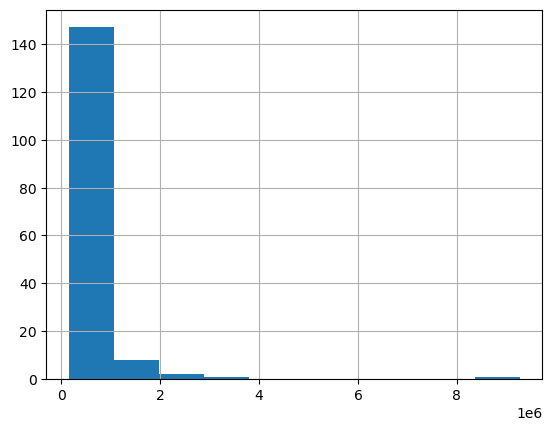

In [351]:
#transformations of variables
newdf['pop_2015'].hist()

<Axes: >

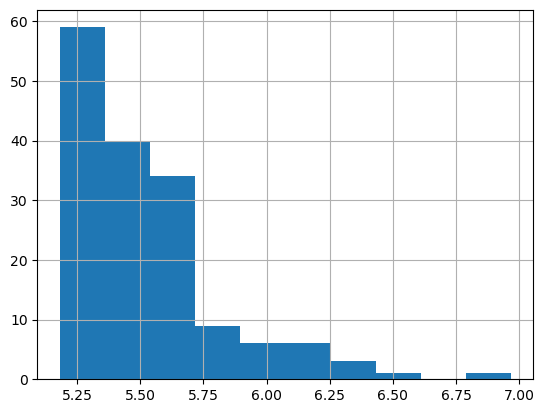

In [353]:
#Log transform
transforms = newdf.copy()
transforms['log'] = transforms['pop_2015'].transform(np.log10)
transforms['log'].hist()

## 7. Save data. 

In [359]:
newdf.to_csv("city-size-japan_restricted.csv", index=False)

## 8. Create a summary statistics table.

In [362]:
np.round(newdf.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
pop_1995,159.0,450115.07,734292.16,123654.0,187629.0,279551.0,415110.5,7967614.0
pop_2000,159.0,458032.83,750512.90,132984.0,192688.0,286521.0,418742.0,8134688.0
pop_2005,159.0,466750.40,780705.64,151240.0,192682.0,288457.0,419682.0,8489653.0
pop_2010,159.0,474780.45,816755.95,154310.0,196319.0,280416.0,421720.0,8945695.0
pop_2015,159.0,478614.98,842115.67,152311.0,193434.5,274656.0,423218.0,9272740.0


## 9. Create a graph of any type.

In [365]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

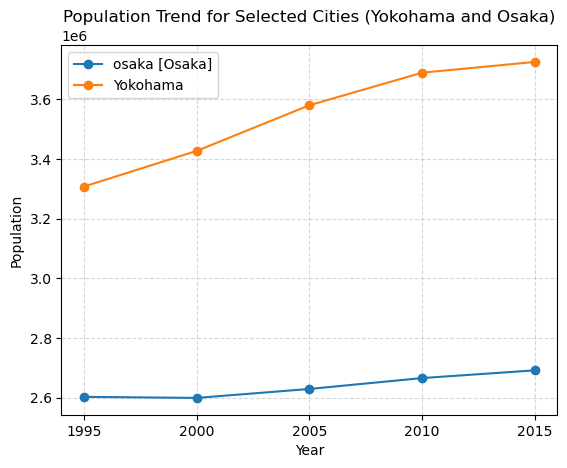

In [403]:
# creating the line chart
#filter the specific cities (Yokohama, Osaka)
years = ["pop_1995", "pop_2000", "pop_2005", "pop_2010", "pop_2015"]
selected_cities = newdf[newdf['City'].isin(["Yokohama", "osaka [Osaka]"])]

for _, row in selected_cities.iterrows():
    plt.plot(years, row[years], marker='o', label=row['City'])

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Trend for Selected Cities (Yokohama and Osaka)")
plt.xticks(range(len(years)), [year.split('_')[1] for year in years])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [1]:
quit()